# Importing Libarires

In [58]:
from bs4 import BeautifulSoup
import requests

To scrape the data of electric vehicle we are going to use following site to extract the data.
Site used for scraping is 'https://ev-database.org/'

In [59]:
url = 'https://ev-database.org/#sort:path~type~order=.rank~number~desc|range-slider-range:prev~next=0~1200|range-slider-acceleration:prev~next=2~23|range-slider-topspeed:prev~next=110~450|range-slider-battery:prev~next=10~200|range-slider-towweight:prev~next=0~2500|range-slider-fastcharge:prev~next=0~1500|paging:currentPage=0|paging:number=9'
HEADERS = ({"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"})
 
r = requests.get(url, headers=HEADERS)
content = r.content
soup = BeautifulSoup(content, "lxml")

# Title of site.

In [60]:
soup.title.text

'Compare electric vehicles - EV Database'

# Body of site

In [61]:
soup.body

<body id="evdb">
<!-- header -->
<header id="header">
<div class="header-top-row">
<section>
<div class="header-logo">
<a href="/"><img alt="EV Database Logo" src="/img/common/EVDB-Logo-EN.svg" width="210"/></a> </div>
<div class="header-top-right">
<div class="header-select-units">
<select id="select_units">
<option selected="" value="/">Metric</option>
<option value="/imp/">UK Imperial</option>
</select>
</div>
<div class="header-search">
<div class="jplist-panel text-filter-box">
<input data-control-action="filter" data-control-name="title-filter" data-control-type="textbox" data-path=".title" maxlength="20" placeholder="Search..." type="text" value=""/>
<i class="fas fa-search text-filter-icon"></i>
</div>
</div>
</div>
</section>
</div>
<div class="header-bot-row">
<nav>
<ul>
<li><a href="/compare/newest-upcoming-electric-vehicle">MOST RECENT</a></li>
<li><a href="/compare/cheapest-electric-vehicle">CHEAPEST EV</a></li>
<li><a href="/compare/electric-vehicle-car-towing-capacity-we

# Extracting elements like price, accerelation, fastspeed, range, efficiency, number of seats and topspeed.

In [62]:
'''Extracting variable price in uk'''

price_of_uk = []
for k in soup.find_all('div'):
  for j in k.find_all('span',attrs={'class':'country_uk'}):
      price_of_uk.append(j.text)

In [63]:
'''Extracting variable price in netherlands'''

price_in_netherlands = []
for k in soup.find_all('div'):
  for j in k.find_all('span',attrs={'class':'country_nl'}):
      price_in_netherlands.append(j.text)

In [64]:
'''Extracting variable price in germany'''

price_in_germany = []
for k in soup.find_all('div'):
  for j in k.find_all('span',attrs={'class':'country_de'}):
      price_in_germany.append(j.text)

In [65]:
'''Extracting variable price in fastcharge_speed'''

fastcharge_speed = []
for k in soup.find_all('div'):
  for i in k.find_all('p'):
    for j in i.find_all('span',attrs={'class':'fastcharge_speed_print'}):
      fastcharge_speed.append(j.text)

In [66]:
'''Extracting variable efficiency'''

efficiency = []
for k in soup.find_all('div'):
  for i in k.find_all('p'):
    for j in i.find_all('span',attrs={'class':'efficiency'}):
      efficiency.append(j.text)

In [67]:
'''Extracting variable range'''

range = []
for k in soup.find_all('div'):
  for i in k.find_all('p'):
    for j in i.find_all('span',attrs={'class':'erange_real'}):
      range.append(j.text)

In [68]:
'''Extracting variable topspeed'''

topspeed = []
for k in soup.find_all('div'):
  for i in k.find_all('p'):
    for j in i.find_all('span',attrs={'class':'topspeed'}):
      topspeed.append(j.text)

In [69]:
'''Extracting variable acceleration'''

acceleration = []
for k in soup.find_all('div'):
  for i in k.find_all('p'):
    for j in i.find_all('span',attrs={'class':'acceleration'}):
      acceleration.append(j.text)

In [70]:
'''Extracting variable number of seat'''

number_of_seat = []
for k in soup.find_all('div'):
  for i in k.find_all('span',attrs={'title':'Number of seats'}):
    if i.text in '123456789':
      number_of_seat.append(i.text)

No_of_seat = []
space = []

for i in number_of_seat:
  if i == '':
    space.append(i)
  else:
    No_of_seat.append(i)


In [71]:
'''Extracting variable battery'''

battery = []
for k in soup.find_all('div'):
  for i in k.find_all('span',attrs={'class':'battery'}):
    battery.append(i.text)

In [72]:
'''Extracting variable model'''

model = []
for k in soup.find_all('h2'):
  for i in k.find_all('span', attrs={'class':'model'}):
    model.append(i.text)

In [73]:
'''Extracting variable vehicle name'''

vehicle_name = []
for k in soup.find_all('h2'):
  for i in k.find_all('span', attrs={'class':['honda','tesla','kia','bmw','mg','hyundai','nissan','renault','volkswagen','skoda','mercedes','toyota','audi','volvo','smart','fisker','lightyear','lucid','lexus','seres','polestar','volkswagen','peugeot','dacia','porsche','mini','cupra','jaguar','aiways','citroen','opel','lexus','sono','subaru','mazda','ford','genesis','jac','xpeng','fiat','smart','ssangyong','ds']}):
    vehicle_name.append(i.text)

# Importing Libarires for Exploratary Data Analysis.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating dataFrame with above extracted variables.

In [75]:
car_df = pd.DataFrame({'class':pd.Series(vehicle_name),'model':pd.Series(model),'battery':pd.Series(battery),'number_of_seat':pd.Series(No_of_seat),'acceleration':pd.Series(acceleration),'topspeed':pd.Series(topspeed),'range':pd.Series(range),'efficiency':pd.Series(efficiency),'fastcharge_speed':pd.Series(fastcharge_speed),'price_in_germany':pd.Series(price_in_germany),'price_in_netherlands':pd.Series(price_in_netherlands),'price_of_uk':pd.Series(price_of_uk)})

car_df

,class,model,battery,number_of_seat,acceleration,topspeed,range,efficiency,fastcharge_speed,price_in_germany,price_in_netherlands,price_of_uk
0,Tesla,Model 3,57.5,5,6.1 sec,225 km/h,380 km,151 Wh/km,630 km/h,"€52,965","€52,995","£48,490"
1,Tesla,Model Y Long Range Dual Motor,75,5,5.0 sec,217 km/h,435 km,172 Wh/km,670 km/h,"€59,965","€66,995","£57,990"
2,Tesla,Model 3 Long Range Dual Motor,75,5,4.4 sec,233 km/h,485 km,155 Wh/km,750 km/h,"€62,465","€60,995","£57,490"
3,MG,MG4 Electric Long Range,61.7,5,8.0 sec,160 km/h,360 km,171 Wh/km,440 km/h,"* €33,000","* €33,000","£28,495"
4,Honda,e,28.5,4,9.0 sec,145 km/h,170 km,168 Wh/km,180 km/h,"€33,850",N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1467,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see number of null values in the dataframe hence dropping it down. 

In [76]:
car_df.dropna(inplace=True)

In [77]:
car_df

,class,model,battery,number_of_seat,acceleration,topspeed,range,efficiency,fastcharge_speed,price_in_germany,price_in_netherlands,price_of_uk
0,Tesla,Model 3,57.5,5,6.1 sec,225 km/h,380 km,151 Wh/km,630 km/h,"€52,965","€52,995","£48,490"
1,Tesla,Model Y Long Range Dual Motor,75,5,5.0 sec,217 km/h,435 km,172 Wh/km,670 km/h,"€59,965","€66,995","£57,990"
2,Tesla,Model 3 Long Range Dual Motor,75,5,4.4 sec,233 km/h,485 km,155 Wh/km,750 km/h,"€62,465","€60,995","£57,490"
3,MG,MG4 Electric Long Range,61.7,5,8.0 sec,160 km/h,360 km,171 Wh/km,440 km/h,"* €33,000","* €33,000","£28,495"
4,Honda,e,28.5,4,9.0 sec,145 km/h,170 km,168 Wh/km,180 km/h,"€33,850",N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...
240,Fiat,E-Ulysse L3 50 kWh,45,8,12.1 sec,130 km/h,175 km,257 Wh/km,280 km/h,"€56,990",N/A,N/A
241,Opel,Zafira-e Life L 50 kWh,45,9,12.1 sec,130 km/h,175 km,257 Wh/km,280 km/h,"€64,075","€57,637","£49,465"
242,Opel,Vivaro-e Combi L 50 kWh,45,9,12.1 sec,130 km/h,175 km,257 Wh/km,280 km/h,"€51,825","€48,380","£31,995"
243,Peugeot,e-Expert Combi Long 50 kWh,45,9,13.1 sec,130 km/h,175 km,257 Wh/km,280 km/h,"€50,980","€50,289",N/A


# Data Sanity.

In [78]:
'''Getting the idea of number of rows and columns'''

print(f'The shape of above dataset is : {car_df.shape} \n')

print(f'The rows of above dataset is : {car_df.shape[0]} \n')

print(f'The columns of above dataset is : {car_df.shape[1]} \n')

The shape of above dataset is : (245, 12) 

The rows of above dataset is : 245 

The columns of above dataset is : 12 



In [79]:
'''Getting Basic Information about the given dataset'''

print('The basic information about the given data is as follows : \n')

car_df.info()

The basic information about the given data is as follows : 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 245 non-null    object
 1   model                 245 non-null    object
 2   battery               245 non-null    object
 3   number_of_seat        245 non-null    object
 4   acceleration          245 non-null    object
 5   topspeed              245 non-null    object
 6   range                 245 non-null    object
 7   efficiency            245 non-null    object
 8   fastcharge_speed      245 non-null    object
 9   price_in_germany      245 non-null    object
 10  price_in_netherlands  245 non-null    object
 11  price_of_uk           245 non-null    object
dtypes: object(12)
memory usage: 24.9+ KB


We can see that all the variable has dtype 'Object'.
Hence to get insights about the data we need to convert certain variable dtype into 'int64'.

# Replacing 'N/A' in variable 'price_in_germany', 'price_in_netherlands','price_of_uk' with value 0

In [80]:
car_df['price_in_germany'] = car_df['price_in_germany'].apply(lambda x : int(0) if x == 'N/A' else x)
car_df['price_in_netherlands'] = car_df['price_in_netherlands'].apply(lambda x : int(0) if x == 'N/A' else x)
car_df['price_of_uk'] = car_df['price_of_uk'].apply(lambda x : int(0) if x == 'N/A' else x)
car_df['fastcharge_speed'] = car_df['fastcharge_speed'].apply(lambda x : int(0) if x == '-' else x)

# Converting string value into numerical value.

In [81]:
car_df['price_in_germany'] = car_df['price_in_germany'].apply(lambda x : x if x == 0 else int(''.join(x.split(',')).lstrip('* €')))
car_df['price_in_netherlands'] = car_df['price_in_netherlands'].apply(lambda x :x if x == 0 else int(''.join(x.split(',')).lstrip('* €')))
car_df['price_of_uk'] = car_df['price_of_uk'].apply(lambda x : x if x == 0 else int(''.join(x.split(',')).lstrip('* £')))

In [82]:
car_df['number_of_seat'] = car_df['number_of_seat'].apply(lambda x : int(x))
car_df['acceleration_in_sec'] = car_df['acceleration'].apply(lambda x : float(x.strip(' sec')))
car_df['topspeed_in_km/h'] = car_df['topspeed'].apply(lambda x : int(x.strip(' km/h')))
car_df['range_in_km'] = car_df['range'].apply(lambda x : int(x.strip(' km')))
car_df['efficiency_in_wh/km'] =  car_df['efficiency'].apply(lambda x : int(x.strip(' Wh/km')))
car_df['fastcharge_speed_in_km/h'] = car_df['fastcharge_speed'].apply(lambda x : 0 if x == 0 else int(x.strip(' km/h')))
car_df['battery'] = car_df['battery'].apply(lambda x : float(x))

# Dropping String variables.

In [83]:
car_df.drop(['acceleration','topspeed','range','efficiency','fastcharge_speed'],axis=1,inplace=True)

In [84]:
car_df.head()

,class,model,battery,number_of_seat,price_in_germany,price_in_netherlands,price_of_uk,acceleration_in_sec,topspeed_in_km/h,range_in_km,efficiency_in_wh/km,fastcharge_speed_in_km/h
0,Tesla,Model 3,57.5,5,52965,52995,48490,6.1,225,380,151,630
1,Tesla,Model Y Long Range Dual Motor,75.0,5,59965,66995,57990,5.0,217,435,172,670
2,Tesla,Model 3 Long Range Dual Motor,75.0,5,62465,60995,57490,4.4,233,485,155,750
3,MG,MG4 Electric Long Range,61.7,5,33000,33000,28495,8.0,160,360,171,440
4,Honda,e,28.5,4,33850,0,0,9.0,145,170,168,180


In [85]:
print('The statistical detail of data is as follows : \n')

car_df.describe()

The statistical detail of data is as follows : 



,battery,number_of_seat,price_in_germany,price_in_netherlands,price_of_uk,acceleration_in_sec,topspeed_in_km/h,range_in_km,efficiency_in_wh/km,fastcharge_speed_in_km/h
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,68.064898,5.595918,61281.514286,61601.865306,40940.869388,7.924490,177.077551,347.551020,200.567347,523.918367
std,20.216024,1.585017,42013.307100,46798.316824,36293.744515,3.213237,40.251236,115.634044,35.879131,264.556839
min,16.700000,2.000000,0.000000,0.000000,0.000000,2.100000,125.000000,95.000000,109.000000,0.000000
25%,52.000000,5.000000,39657.000000,37585.000000,0.000000,5.400000,150.000000,260.000000,173.000000,310.000000
50%,68.000000,5.000000,53990.000000,54990.000000,40215.000000,7.500000,160.000000,355.000000,191.000000,470.000000
75%,82.500000,5.000000,69160.000000,69333.000000,57990.000000,10.000000,200.000000,420.000000,219.000000,670.000000
max,118.000000,9.000000,297500.000000,302500.000000,157160.000000,19.100000,322.000000,695.000000,295.000000,1240.000000


In [86]:
'''Checking for null values if any'''

print('Total number of null values in follow data is : \n')

car_df.isnull().sum()

Total number of null values in follow data is : 



class                       0
model                       0
battery                     0
number_of_seat              0
price_in_germany            0
price_in_netherlands        0
price_of_uk                 0
acceleration_in_sec         0
topspeed_in_km/h            0
range_in_km                 0
efficiency_in_wh/km         0
fastcharge_speed_in_km/h    0
dtype: int64

# Data Visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08fb2e7350>,
      dtype=object)

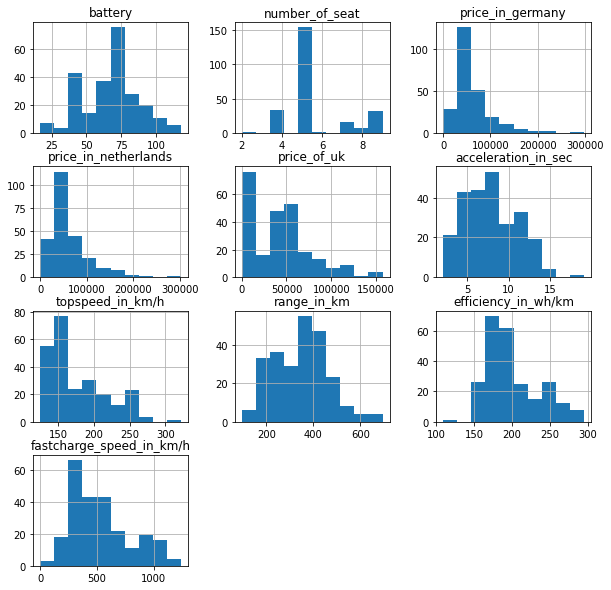

In [87]:
car_df.hist(figsize=(10,10))

In [88]:
numerical_df = car_df.select_dtypes(include='number')
numerical_df

,battery,number_of_seat,price_in_germany,price_in_netherlands,price_of_uk,acceleration_in_sec,topspeed_in_km/h,range_in_km,efficiency_in_wh/km,fastcharge_speed_in_km/h
0,57.5,5,52965,52995,48490,6.1,225,380,151,630
1,75.0,5,59965,66995,57990,5.0,217,435,172,670
2,75.0,5,62465,60995,57490,4.4,233,485,155,750
3,61.7,5,33000,33000,28495,8.0,160,360,171,440
4,28.5,4,33850,0,0,9.0,145,170,168,180
...,...,...,...,...,...,...,...,...,...,...
240,45.0,8,56990,0,0,12.1,130,175,257,280
241,45.0,9,64075,57637,49465,12.1,130,175,257,280
242,45.0,9,51825,48380,31995,12.1,130,175,257,280
243,45.0,9,50980,50289,0,13.1,130,175,257,280


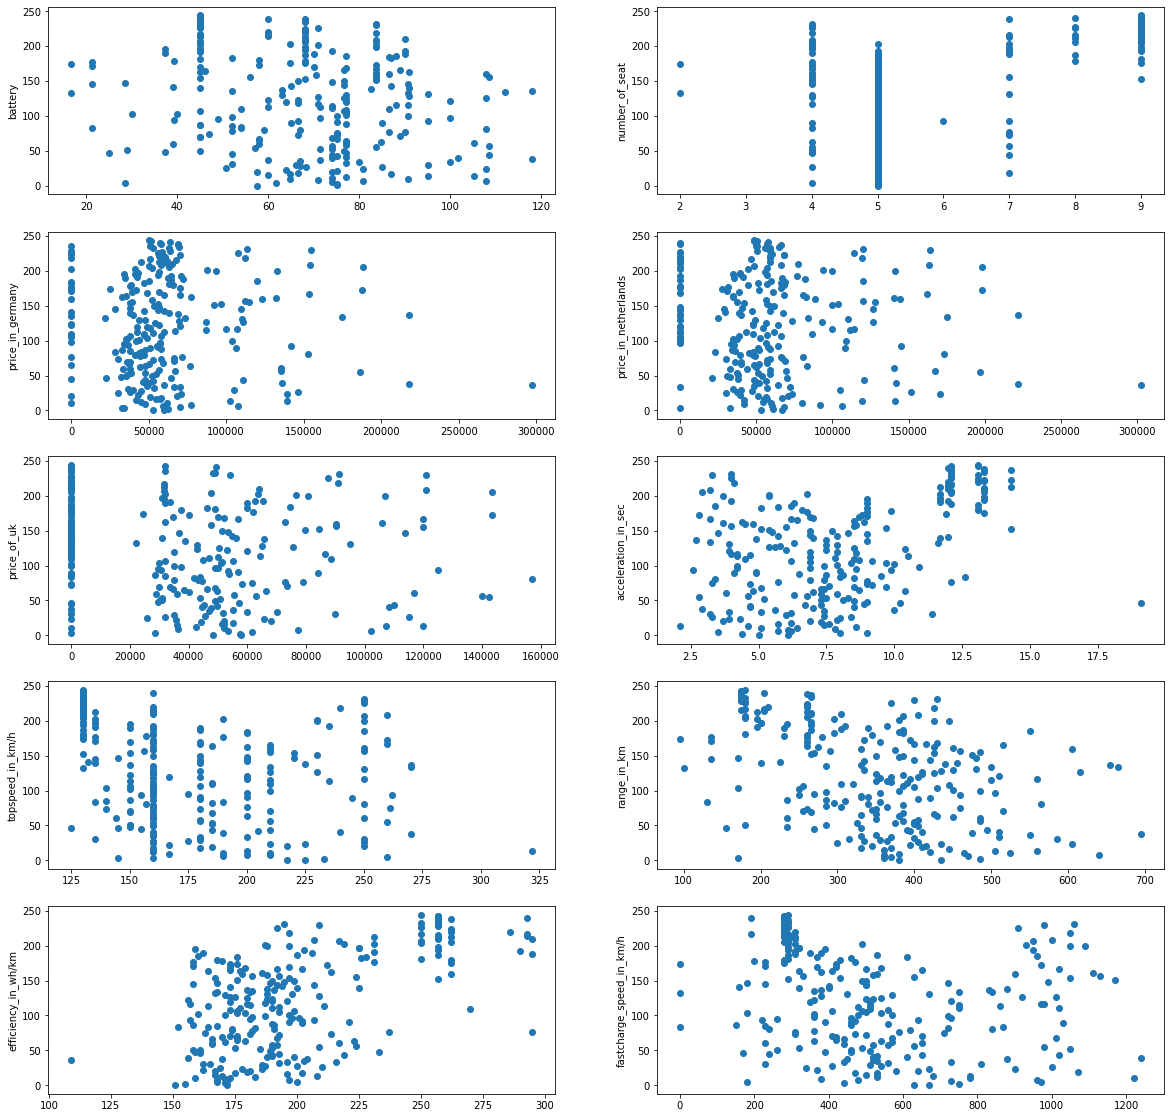

In [89]:
column = list(numerical_df.columns)

rows = 5
col = 2
col_index = 0

fig,ax = plt.subplots(nrows=rows,ncols=col,figsize=(20,20))

for i in [0,1,2,3,4]:
  for j in [0,1]:
    ax[i][j].scatter(x= numerical_df[column[col_index]], y=numerical_df.index)
    ax[i][j].set_ylabel(column[col_index])
    col_index += 1

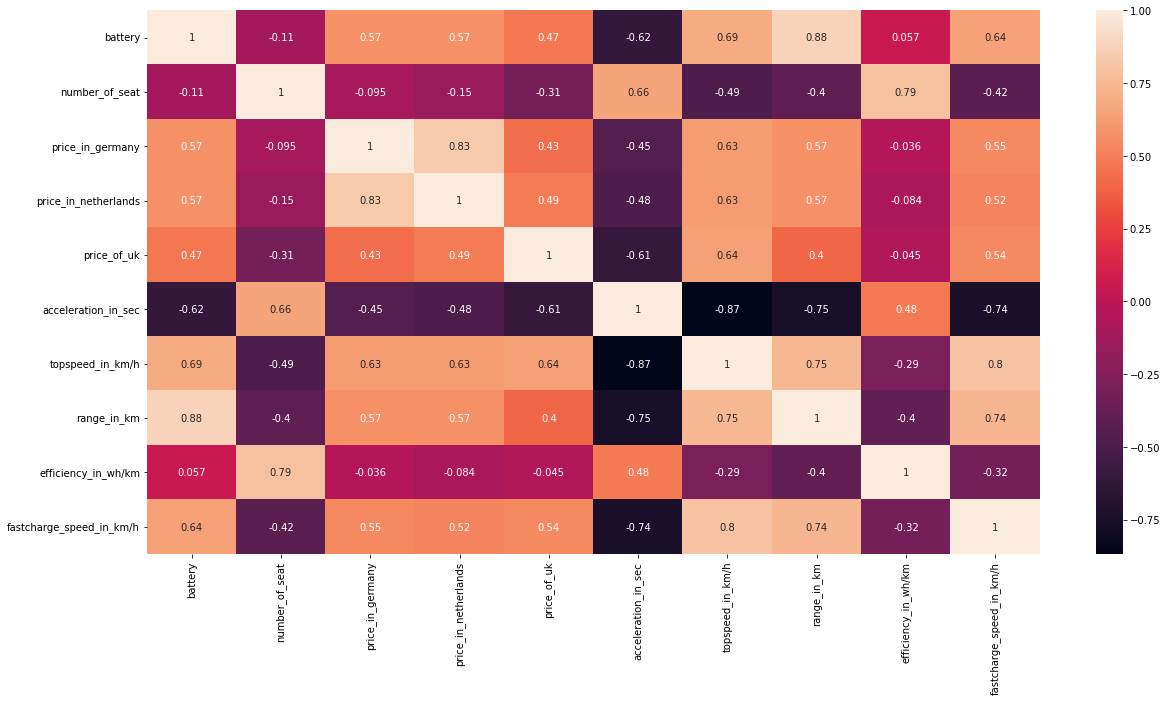

In [90]:
plt.figure(figsize=(20,10))
sns.heatmap(numerical_df.corr(),annot=True)

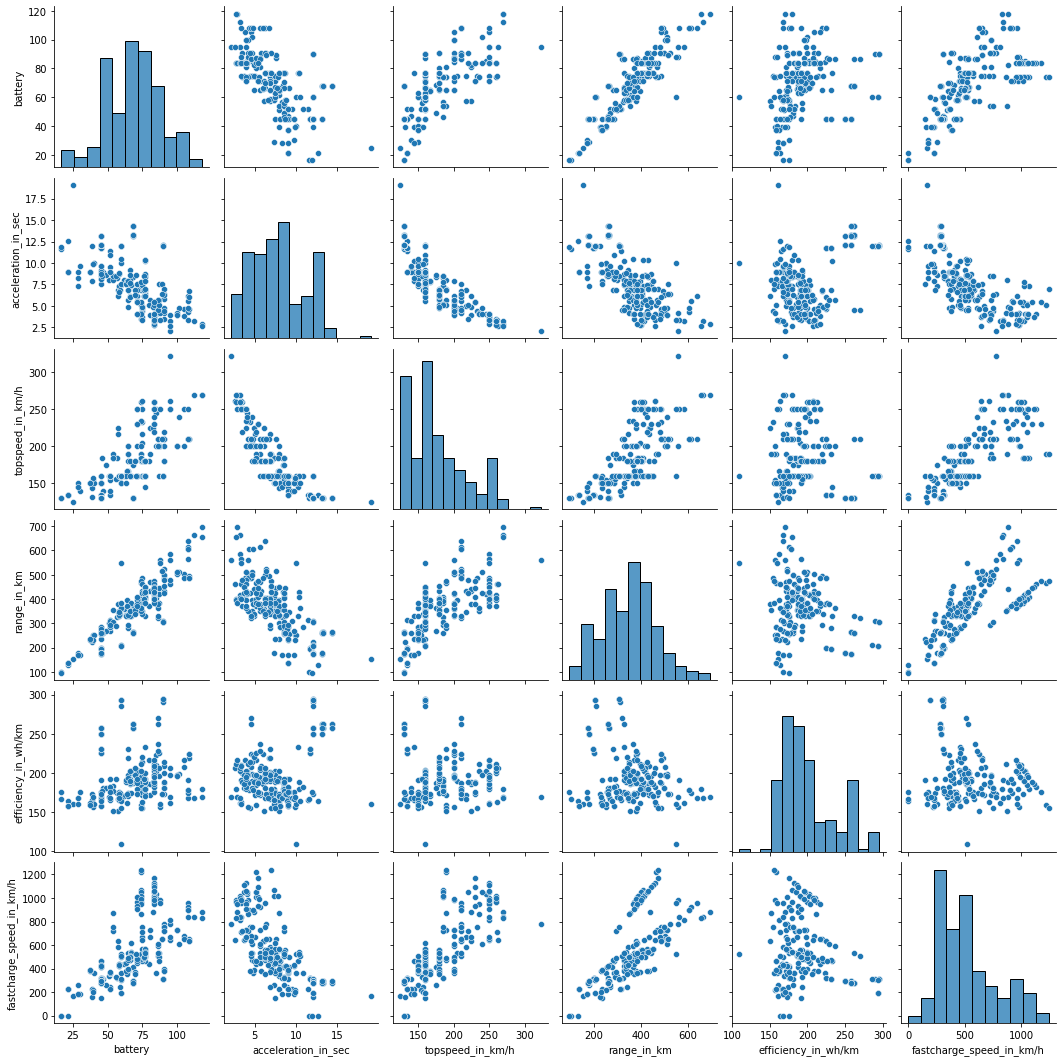

In [57]:
sns.pairplot(numerical_df.drop(['price_in_germany','price_in_netherlands','price_of_uk','number_of_seat'],axis=1))

# Duplicating the dataframe.

In [91]:
copy1_df = car_df
copy1_df

,class,model,battery,number_of_seat,price_in_germany,price_in_netherlands,price_of_uk,acceleration_in_sec,topspeed_in_km/h,range_in_km,efficiency_in_wh/km,fastcharge_speed_in_km/h
0,Tesla,Model 3,57.5,5,52965,52995,48490,6.1,225,380,151,630
1,Tesla,Model Y Long Range Dual Motor,75.0,5,59965,66995,57990,5.0,217,435,172,670
2,Tesla,Model 3 Long Range Dual Motor,75.0,5,62465,60995,57490,4.4,233,485,155,750
3,MG,MG4 Electric Long Range,61.7,5,33000,33000,28495,8.0,160,360,171,440
4,Honda,e,28.5,4,33850,0,0,9.0,145,170,168,180
...,...,...,...,...,...,...,...,...,...,...,...,...
240,Fiat,E-Ulysse L3 50 kWh,45.0,8,56990,0,0,12.1,130,175,257,280
241,Opel,Zafira-e Life L 50 kWh,45.0,9,64075,57637,49465,12.1,130,175,257,280
242,Opel,Vivaro-e Combi L 50 kWh,45.0,9,51825,48380,31995,12.1,130,175,257,280
243,Peugeot,e-Expert Combi Long 50 kWh,45.0,9,50980,50289,0,13.1,130,175,257,280


# Efficiency Ranking of Electric Cars.

In [92]:
'''Grouping on the basis of model and comparing efficiency ranking'''

copy1_df = copy1_df.groupby('model').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='efficiency_in_wh/km',ascending=False)

'''Data Visualization of class Vs Efficiency'''

import plotly.express as px
fig = px.bar(copy1_df[0:40], x='model', y='efficiency_in_wh/km',title="Efficiency Ranking of Electric Cars on the basis of Model")
fig.show()

# We can see that in Top 5 model in Efficiency ranking are :
1. eVito Tourer Extra-Long 90 kWh.
2. e-tron Sportback 55 quattro.
3. e-Traveller Standard 75 kWh.
4. e-SpaceTourer XL 75 kWh.
5. bZ4X FWD.


In [93]:
'''Grouping on the basis of class and comparing efficiency ranking'''

copy1_df = copy1_df.groupby('class').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='efficiency_in_wh/km',ascending=False)

'''Data Visualization of class Vs Efficiency'''

fig = px.bar(copy1_df[0:40], x='class', y='efficiency_in_wh/km',title="Efficiency Ranking of Electric Cars on the basis of Class")
fig.show()

# We can see that in Top 5 class in Efficiency ranking are :
1. Mercedes.
2. Audi.
3. Peugeot.
4. Citroen.
5. Toyota.

# Battery Ranking of Electric Cars.

In [94]:
'''Grouping on the basis of model and comparing Battery ranking'''

copy1_df = copy1_df.groupby('model').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='battery',ascending=False)

'''Data Visualization of Model vs Battery Ranking'''

fig = px.bar(copy1_df[0:40], x='model', y='battery',title="Battery Ranking of Electric Cars on the basis of Model")
fig.show()

We can see that in Top 5 Model in Battery ranking are :
1. Air Touring.
2. evito Tourer Long 90 kWh.
3. iX3.
4. Ocean Ultra.
5. Model Y Performance.

In [95]:
'''Grouping on the basis of class and comparing Battery ranking'''

copy1_df = copy1_df.groupby('class').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='battery',ascending=False)

'''Data Visualization of Class vs Battery Ranking'''

fig = px.bar(copy1_df[0:40], x='class', y='battery',title="Battery Ranking of Electric Cars on the basis of Class")
fig.show()

We can see that in Top 5 Model in Battery ranking are :
1. Lucid.
2. Mercedes.
3. BMW.
4. Fisker.
5. Tesla.

In [96]:
'''Grouping on the basis of Model and comparing Range ranking'''

copy1_df = copy1_df.groupby('model').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='range_in_km',ascending=False)

'''Data Visualization of Model vs Battery Ranking'''

fig = px.bar(copy1_df[0:40], x='model', y='range_in_km',title="Range Ranking of Electric Cars on the basis of model")
fig.show()

We can see that in Top 5 Model in Range ranking are :
1. Air Touring.
2. evito Tourer Long 90 kWh.
3. Model Y Performance.
4. 0.
5. Ocean Ultra.

In [97]:
'''Grouping on the basis of class and comparing Range ranking'''

copy1_df = copy1_df.groupby('class').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='range_in_km',ascending=False)

'''Data Visualization of class vs Battery Ranking'''

fig = px.bar(copy1_df[0:40], x='class', y='range_in_km',title="Range Ranking of Electric Cars on the basis of class")
fig.show()

We can see that in Top 5 class in Range ranking are :
1. Lucid.
2. Mercedes.
3. Tesla.
4. Lightyear.
5. Fisker.

In [98]:
'''Grouping on the basis of model and comparing Topspeed ranking'''

copy1_df = copy1_df.groupby('model').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='topspeed_in_km/h',ascending=False)

'''Data Visualization of class vs Topspeed Ranking'''

fig = px.bar(copy1_df[0:40], x='model', y='topspeed_in_km/h',title="Topspeed Ranking of Electric Cars on the basis of model")
fig.show()

We can see that in Top 5 model in Topspeed ranking are :
1. Model Y Performance.
2. Air Touring.
3. e-soul 64 kWh.
4. Taycan Turbo Sport Turismo.
5. iX3.

In [99]:
'''Grouping on the basis of class and comparing Topspeed ranking'''

copy1_df = copy1_df.groupby('class').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='topspeed_in_km/h',ascending=False)

'''Data Visualization of class vs Topspeed Ranking'''

fig = px.bar(copy1_df[0:40], x='class', y='topspeed_in_km/h',title="Topspeed Ranking of Electric Cars on the basis of class")
fig.show()

We can see that in Top 5 class in Battery ranking are :
1. Tesla.
2. Lucid.
3. Porsche.
4. Kia.
5. BMW.

In [100]:
'''Grouping on the basis of model and comparing Acceleration ranking'''

copy1_df = copy1_df.groupby('model').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='acceleration_in_sec',ascending=False)

'''Data Visualization of class vs Acceleration Ranking'''

fig = px.bar(copy1_df[0:40], x='model', y='acceleration_in_sec',title="Acceleration Ranking of Electric Cars on the basis of model")
fig.show()

We can see that in Top 5 model in Acceleration ranking are :
1. Spring Electric.
2. e-Traveller Standard 75 kWh.
3. Zafira-e Life M 75 kWh.
4. E-Ulysse L3 75 kWh.
5. e-SpaceTourer XL 75 kWh.

In [101]:
'''Grouping on the basis of class and comparing Acceleration ranking'''

copy1_df = copy1_df.groupby('class').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='acceleration_in_sec',ascending=False)

'''Data Visualization of class vs Acceleration Ranking'''

fig = px.bar(copy1_df[0:40], x='class', y='acceleration_in_sec',title="Acceleration Ranking of Electric Cars on the basis of class")
fig.show()

We can see that in Top 5 class in Acceleration ranking are :
1. Dacia.
2. Peugeot.
3. Opel.
4. Citroen.
5. Fiat.

In [102]:
'''Grouping on the basis of model and comparing Fastcharge Speed ranking'''

copy1_df = copy1_df.groupby('model').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='fastcharge_speed_in_km/h',ascending=False)

'''Data Visualization of class vs Fastcharge Speed Ranking'''

fig = px.bar(copy1_df[0:40], x='model', y='fastcharge_speed_in_km/h',title="Fastcharge Speed Ranking of Electric Cars on basis of Model")
fig.show()

We can see that in Top 5 class in Acceleration ranking are :
1. Kona Electric 64 kWh.
2. Taycan Turbo Sport Turismo.
3. e-soul 64 kWh.
4. e-tron Sportback 55 quattro.
5. GV70 Electrified Sport.

In [103]:
'''Grouping on the basis of class and comparing Fastcharge Speed ranking'''

copy1_df = copy1_df.groupby('class').max()
copy1_df.reset_index(inplace=True)
copy1_df = copy1_df.sort_values(by='fastcharge_speed_in_km/h',ascending=False)

'''Data Visualization of class vs Fastcharge Speed Ranking'''

fig = px.bar(copy1_df[0:40], x='class', y='fastcharge_speed_in_km/h',title="Fastcharge Speed Ranking of Electric Cars on basis of Class")
fig.show()

We can see that in Top 5 class in Acceleration ranking are :
1. Hyundai.
2. Porsche.
3. Kia.
4. Audi.
5. Genesis.